# <center>Assignment 1</center>

This assignment is on Nearest Neighbors. It is preferred that you code in Python3. All the imports made in this notebook are as below; if these imports work, you are (mostly) set to complete the assignment.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier as KNC
import time

C:\Users\Nic\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<table>
  <tr>
    <td>**Section**</td>
    <td>**Score**</td>
  </tr>
  <tr>
    <td> Short-answer questions </td>
    <td> 7 </td>
  </tr>
  <tr>
    <td> MNIST data preprocessing </td>
    <td> 10 </td>
  </tr>
  <tr>
    <td> KNN Classifier </td>
    <td> 25 </td>
  </tr>
    <tr>
    <td> Cross-validation </td>
    <td> 5 </td>
  </tr>
      <tr>
    <td> KNN on Synthetic Dataset </td>
    <td> 23 </td>
  </tr>
     <tr>
    <td> Analyzing performance on MNIST  </td>
    <td> 15 </td>
  </tr>
  <tr>
    <td> **Total**  </td>
    <td> **85** </td>
  </tr>
  </table>

## 1. Short-answer questions [1+2+1+3]
Answer very briefly. [Ideally, 1 line per question.]

* Fill in the blank: K-NN is ____ (parameterized/non-parameterized). 

<b>Answer: Non-Parametrized</b>


* "KNN algorithm works best if the data is normalized (zero-mean and unit variance)". Why? <br>
    - For MNIST, do we need to normalize? Why/why not?

<b>Answer: One reason is because it standardizes the data, and also rescales it e.g. everything becomes on a common scale. [0,1] or [-1,1], or whatever you want your common scale to be. For example, if you had some features that went from [0,1] and another that went [0,1000], euclidean distance will make clusters due to the [0,1000] set rather than the others, leading to missclassifications. We do not need to normalize for MNIST because everything is on a common scale [0,255] grey scale.</b>

* "Data is partitioned into Training, Validation and Test Datasets." What is the Validation dataset used for?

<b>Answer: To test how good the algorithm is, by letting it predict classifications for the validation set as if it was unknown, and then comparing the classifications to the true labels of the validation set.</b>

* What is cross-validation? When is cross-validation done? How does this relate to Validation Dataset?

<b>Answer: Cross-validation is a method of statistical analysis to determine how accurately the algorithm predicts data. We use cross-validation before an algorithm is used on real data, with the purpose of seeing how well it does at classifying some known data that we have whilst treating it as unknown. In terms of the validation set, cross-validation is the method used to determine the accuracy of our model through using the validation set as an unknown set and then comparing the algorithms results to the known values of the validation dataset. </b>

## 2. MNIST data

Let's load the MNIST dataset and inspect it.

In [5]:
mnist = tf.keras.datasets.mnist
(train_data,train_labels),(test_data,test_labels) = mnist.load_data()

print("Number of training examples\t",len(train_data))
print("Number of test instances\t",len(test_data))
print("Shape of train_data\t\t",train_data.shape)
print("Shape of train_labels\t\t",train_labels.shape)
print("Shape of test_data\t\t",test_data.shape)
print("Shape of test_labels\t\t",test_labels.shape)

Number of training examples	 60000
Number of test instances	 10000
Shape of train_data		 (60000, 28, 28)
Shape of train_labels		 (60000,)
Shape of test_data		 (10000, 28, 28)
Shape of test_labels		 (10000,)


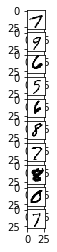

In [6]:
# Randomly choose 10 images from first 1000 images of Train Data.
for index,idx in enumerate(random.sample(range(1000),10)): 
    plt.subplot(10,1,index+1)
    plt.imshow(train_data[idx],cmap="Greys")

In [7]:
# I'm keeping unflattened version for problem 6
notFlatTrainData = np.copy(train_data)
notFlatTestData = np.copy(test_data)
# 5 points
# Flatten the train_data and test_data for faster computation.
train_data = train_data.reshape(train_data.shape[0],train_data.shape[1]*train_data.shape[2])
test_data = test_data.reshape(test_data.shape[0],test_data.shape[1]*test_data.shape[2])

# If the datatype of the above arrays is int8, convert them to float/int 32/64.
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')



Find out why we need to convert from int8 to float/int 32/64. [5 pts]

<b>Answer: One reason to convert to float is so that we can normalize our pixel gray scale values between the range 0-1, rather than leaving the number range to work with between 0-255. Another reason is most CPU's work in float32, and hence it speeds up processing time.  </b>

## 3. KNN Classifier [25 pts]

General Hint: 
* Initially don't try to do any extra optimization: start by just getting the basic kNN algorithm to work.
* Try as simple a version as you can:
   * can you try it for a small set of low-dimensional points?
   * can you try it for a tiny set (e.g. 3 or 4) of MNIST images?

* Once you've got the basics working for a tiny data set, compute the Euclidean Distance more efficiently by using:
$$|| x - y||_2 = x.x^T -2x.y + y.y^T$$

In [8]:
from scipy.spatial.distance import cdist
class KNN:
    def __init__(self, k , num_classes):
        self.num_classes = num_classes
        self.k = k
        self.parameters = None
    
    def distance_batch(self,data):# M x 784; N x 784
        global distances
        """
        Find the distance between M instances of data and N instances of training_data.
        data.shape = M,D and training_data.shape= N,D
        The fastest way to find euclidean distance between x and y is described above.
        Observe that x[train] is constant and y [test] is variable.
        """
        distances = cdist(data,self.parameters[0])
        return distances
    
    def train(self, training_data, training_labels):
        """
        Train the classifier using the training data and training labels.
        Hint: Look at Q1 in Review Questions.
        * Store whatever is neccessary in self.parameters.
        * Do whatever pre-computation you think is neccessary to make the distance_batch function run fast.
        """
        self.parameters = [training_data,training_labels]
        
    def predict(self, data):
        """
        Make use of the trained parameters to predict the class.
        Return the most probable class.
        Make use of the predict_proba function.
        Hint: np.argmax will be useful.
        """ 
        Probabilities = self.predict_proba(data) #  Get the probability distributions for each point
        predictions = []
        for i in range((data.shape[0])): #  Make the prediction based on highest probability from the distribution for each point
            predictions.append(np.argmax(Probabilities[i]))
        return predictions
        pass
    
    def predict_proba(self,data):
        """
        For each data point, predict the assigned class probabilities.
        For faster sorting, use np.argpartition.
        """
        
        distances = self.distance_batch(data) #  Get the distance array of each point
        ProbDist = []
        
        for i in range((data.shape[0])): #  Iterate over all of the data, and find the k nearest neighbours
            SortedDist = np.argpartition(distances[i],self.k)
            temp = []
            
            for j in range(self.k): #  Find the associated labels to the nearest neighbours
                temp.append(self.parameters[1][SortedDist[j]])
            c = np.bincount(temp,minlength=self.num_classes) #  Count up how many of those labels you have, return array of dist
            ProbDist.append(c) #  append the counts array 
            
        ProbDist = np.array(ProbDist) #  Make it an array
        ProbDist = ProbDist/self.k    #  Divide by k so that the probabilities are on a [0,1] scale
        return ProbDist
    
    def accuracy(self, data, labels):
        """
        Returns the accuracy as a percentage computed over the data.
        Already completed for you!
        """
        num_correct = 0
        num_seen = 0
        pred_labels = np.array(self.predict(data))
        return (pred_labels==labels).sum()/len(data)

Let's instatiate our KNN and the KNN provided by SkLearn. 

In [9]:
custom_knn = KNN(k=5,num_classes=10)
custom_knn.train(train_data,train_labels)

sklearn_knn = KNC(5,algorithm="brute")
sklearn_knn.fit(train_data,train_labels)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

First, we will check the accuracy <u>on first 100</u> examples of test dataset.

In [10]:
t=time.clock()
print("Custom KNN Accuracy:\t",custom_knn.accuracy(test_data[:100],test_labels[:100]))
print("Time taken:\t\t",time.clock()-t,"\n")

t=time.clock()
print("SkLearn KNN Accuracy:\t",(sklearn_knn.predict(test_data[:100])==test_labels[:100]).sum()/100)
print("Time taken:\t\t",time.clock()-t)

Custom KNN Accuracy:	 0.99
Time taken:		 5.9258602 

SkLearn KNN Accuracy:	 0.99
Time taken:		 0.25935350000000046


To check correctness, we will sample 200 examples from the test dataset and compare the predict_proba methods.

In [11]:
indices = random.sample(range(len(test_data)),200)
selected_data = test_data[indices]
selected_labels = test_labels[indices]
print((custom_knn.predict_proba(selected_data)==sklearn_knn.predict_proba(selected_data)).all())

True


After you have completed all the methods, the output of the above cell should be <code>True</code>.

## 4. Cross-validation to choose <code>k</code>

Use SkLearn to perform <b>10-fold cross-validation</b> across different values of k [1,5,10,15,20]. Use accuracy as the metric.
    - Plot the graph of test accuracy (along with standard-deviation) for each value of k.
    - What is the ideal value of k according to your experiments?
    - How did you decide?

Tips:
* Use the KNN classifier provided SkLearn for the experiments. 
* Refer to <a href="https://scikit-learn.org/stable/modules/cross_validation.html">this</a> page for info on using cross-validation in sklearn.
* Refer to <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html">this</a> page for details on plotting graphs with error-bars.

In [12]:
# Worth 10 points
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
def kNN_CrossVal(data,labels,ks=[1,5,10,15,20]):
    """
    Write code to generate graph of test-accuracy along with standard deviation
    as a function of the ks.
    """
    ksTestAccuracy = []
    for i in ks: #  for each value of k
        kf = KFold(n_splits=10) # set your 10 splits
        temp = []
        for train_index, test_index in kf.split(data): #  loop over all train and test indices in the splits
            train_data, test_data = data[train_index], data[test_index] #  Set the train and test data, and then labels
            train_labels, test_labels = labels[train_index], labels[test_index]
            
            sklearn_knn = KNC(i,algorithm="brute") #  Initialize sklearn to use k nearest neighbours
            sklearn_knn.fit(train_data,train_labels)
            
            temp.append((sklearn_knn.predict(test_data)==test_labels).sum()/len(test_data)) #  compute the accuracy
            
        ksTestAccuracy.append(temp) #  append the accuracy
        
    ksMeans = []
    ksSTD = []
    
    for i, value in enumerate(ks):
            ksMeans.append(np.mean(ksTestAccuracy[i])) #  take the mean for all 10 accuracies for each k
            ksSTD.append(np.std(ksTestAccuracy[i]))  # take the standard deviation for all 10 accuracies for each k
            
    plt.figure() #  plot the accuracy vs k with error bars taking the form of the standard deviation
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.errorbar(ks,ksMeans,yerr=ksSTD,fmt='.',ecolor='r')
    pass

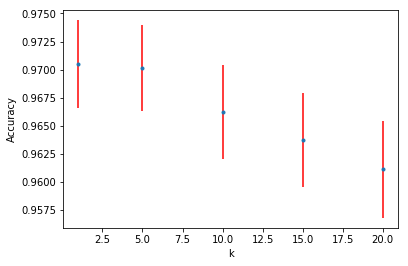

In [13]:
kNN_CrossVal(train_data,train_labels)

Comment on your observations. 
<b>Answer: It looks like 1 Nearest Neighbour had the best average accuracy in this case, and the standard deviation was the same size as that of 5 Nearest Neighbours. So it looks like the best choice in this specific scenario is 1 Nearest Neighbour if you consider only accuracy. However typically choosing k=5 is better since k=1 is prone to overfitting, incase of missclassified training data. Therefore you need to weigh the potential of overfitting alongside accuracy to decide which is optimal. Seeing as the average accuracy change between k=1 and k=5 is minimal here, k=5 is probably a safer bet.</b>


## 5. KNN on a synthetic dataset [5 + 5 + 13]

Complete the following functions which generate synthetic data:
* The function generator_simple generates data of <i>N</i> number_dimensions such that <code>label(X) = 0 if X<sub>0</sub> &le; 0.5 else 1</code>.
* The function generator_complex generates data of <i>N</i> number_dimensions such that <code>label(X) = 0 if X<sub>0</sub> &le; 0.5 XOR X<sub>1</sub> &le; 0.5 else 1</code>.

Note: Each of the dimensions of the data are indepedent and uniformly distributed between 0 and 1.

In [14]:
# Worth 5 points
def generator_simple(number_examples,number_dimensions):
    
    data = []
    labels = []
    
    for i in range(number_examples): #  do the process the amount of data points you want e.g. number_examples
        temp = np.random.rand(number_dimensions) #  random array with size number_dimensions
        data.append(temp)
        
        if temp[0]<=0.5: #  label the data class 0 if first component less than 0.5
            labels.append(0)
        
        else: #  otherwise label the data class 1
            labels.append(1)
    
    data = np.array(data) #  turn them into arrays because arrays are easier to work with
    labels = np.array(labels)
    
    return data,labels

In [15]:
# Worth 5 points
def generator_complex(number_examples,number_dimensions=2):
    
    data = []
    labels = []
    
    for i in range(number_examples):
        temp = np.random.rand(number_dimensions)
        
        if (temp[0]<=0.5 or temp[1]<=0.5): #  or in python is inclusive so if 1, or the other, or both enter this
            
            if (temp[0]<=0.5 and temp[1]<=0.5): #  However if both are <0.5 , then label it class 1
                labels.append(1)
            
            else: #  other wise if it's just 1 or the other that are <0.5 label it a 0
                labels.append(0)
        
        else: # otherwise if both are >0.5 label it a 1
            labels.append(1)
            
        data.append(temp)
        
    data = np.array(data)
    labels = np.array(labels)
    
    return data,labels

Now:
* Perform cross-fold-validation [Use kNN_CrossVal] using 1000 generated data points.
* Vary the number of dimensions and report the results.

Text(0.5,1,'simple , d=784')

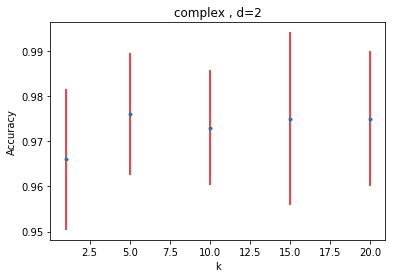

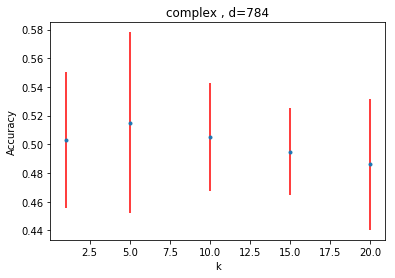

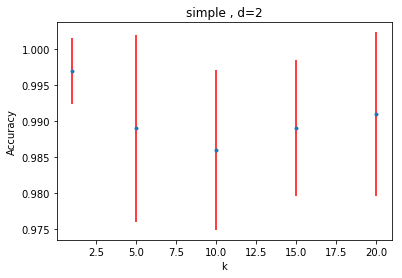

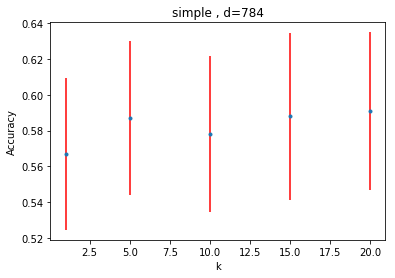

In [16]:
data,labels = generator_complex(1000,2) #  Show the accuracy of k if you do 2 d synthesized data
kNN_CrossVal(data,labels)
plt.title('complex , d=2')

data,labels = generator_complex(1000,784) #  Show the accuracy of k if you do MNIST dimensional synthesized data
kNN_CrossVal(data,labels)
plt.title('complex , d=784')

data,labels = generator_simple(1000,2)
kNN_CrossVal(data,labels)
plt.title('simple , d=2')

data,labels = generator_simple(1000,784)
kNN_CrossVal(data,labels)
plt.title('simple , d=784')





How does KNN perform on synthesized datasets of dimensionality of the order of those of MNIST images [784 dimensions]?
* Comment on your observations. [3 pts]
* Why is there a difference in behavior? [10 pts] <br>
[Will be good if you can you graphically compare and contrast. <b>(Possibly hard)</b>]

<b>Answer: KNN does not perform well on synthesized datasets of dimensionality of the order of MNIST images. An average accuracy of 50% over all the k-values is quite literally random, since there is only two classes. These values of accuracy can be compared to the low dimensionality e.g. 2 dimensional plots, where the algorithm returned accuracies between 0.98-0.993 for the list of k=[1,5,10,15,20].

As was mentioned in class typically images or in this case digits (when talking about MNIST) don't look random, whereas the synthesized data set has a random component to the other dimensions beyond the first in the case of the simple generator and the first two in terms of the complex generator. This leads to the classifications not being clustered in the same manner that real data is clustered. And so KNN will not be able to as easily link a test point to a cluster of a classification as they will be random in higher dimensions. Which can be seen in the 2nd figure in the next section, which takes the organized first axis, and then a random axis as the y axis, and you can see the classification isn't clear in this plane. Meaning distances aren't going to be as linked to class.</b>


Text(0,0.5,'Random Dimension')

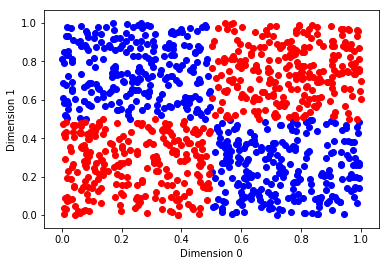

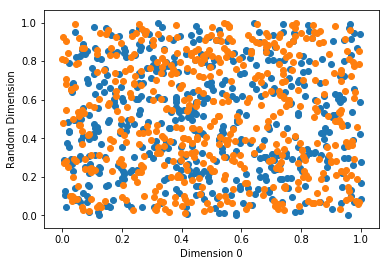

In [17]:
data,labels = generator_complex(1000,2) #  get the data
colors = ['b','r'] #  intialize colours to differentiate the two classes
inds = labels.argsort() #  sort the arguments of labels so we can associate which data is of which type
labels.sort() #  properly sort the labels

sortedData = data[inds] #  use the indices to sort the data into class 0 and class 1
splitIdx = np.where(labels==1)[0][0] #  find where the labels turn to 1, that is the split point of class 0 vs class 1
DataType0 = sortedData[:splitIdx] #  label the data accordingly
DataType1 = sortedData[splitIdx:]

plt.figure() # plot the two type of data
plt.scatter(DataType0[:,0],DataType0[:,1],color=colors[0])
plt.scatter(DataType1[:,0],DataType1[:,1],color=colors[1])
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 1')

#  Repeat the above process but now for a 784 dimensional image
dataLarge,labelsLarge = generator_complex(1000,784)
colors = ['b','r']
inds = labelsLarge.argsort()
labelsLarge.sort()
sortedData = dataLarge[inds]
splitIdx = np.where(labels==1)[0][0]
DataType0 = sortedData[:splitIdx]
DataType1 = sortedData[splitIdx:]

plt.figure() # plot random second axis
randInt = np.random.randint(1,784) # make sure that the second axis of both classes is the same and not 1, e.g. the organized axis
plt.scatter(DataType0[:,0],DataType0[:,randInt])
plt.scatter(DataType1[:,0],DataType1[:,randInt])
plt.xlabel('Dimension 0')
plt.ylabel('Random Dimension')
    


## 6. Analyzing performance on MNIST [15 pts]

- Analyze the images which got misclassified by KNN by showing in detail the Nearest Neighbors. Use k=5. <b>[possibly will take effort]</b>
- In order to demonstrate weaknesses, you are welcome to create new examples. [You can use any value of k in this case]

<b>Comment: You can see that the images that were missclassified either had significantly similar features to another number, or the probability distribution between the correct label and predicted label were very close. E.g. in some cases 3 neighbours were of the incorrect label, and 2 neighbours of the correct label.</b>

Time taken:		 1.0420716999999513
Prediction was:  [0]
The 5 nearest neighbours were:  [4, 0, 4, 0, 0]
The correct answer was:  [4] 

Prediction was:  [9]
The 5 nearest neighbours were:  [9, 9, 9, 9, 9]
The correct answer was:  [4] 

Prediction was:  [1]
The 5 nearest neighbours were:  [5, 5, 1, 1, 1]
The correct answer was:  [3] 

Prediction was:  [8]
The 5 nearest neighbours were:  [8, 8, 9, 8, 9]
The correct answer was:  [9] 

Prediction was:  [6]
The 5 nearest neighbours were:  [4, 6, 6, 6, 6]
The correct answer was:  [4] 

Prediction was:  [1]
The 5 nearest neighbours were:  [1, 1, 1, 1, 1]
The correct answer was:  [4] 

Prediction was:  [0]
The 5 nearest neighbours were:  [2, 0, 3, 0, 3]
The correct answer was:  [2] 

Prediction was:  [7]
The 5 nearest neighbours were:  [7, 7, 1, 9, 7]
The correct answer was:  [9] 

Prediction was:  [7]
The 5 nearest neighbours were:  [7, 7, 7, 7, 7]
The correct answer was:  [2] 

Prediction was:  [4]
The 5 nearest neighbours were:  [4, 4, 6, 4, 7

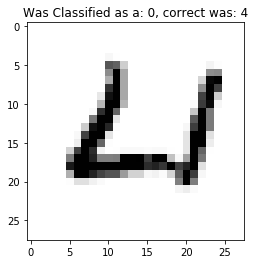

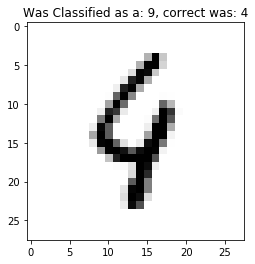

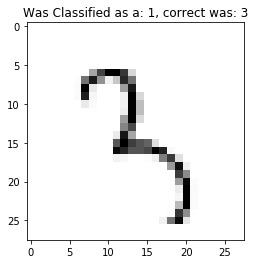

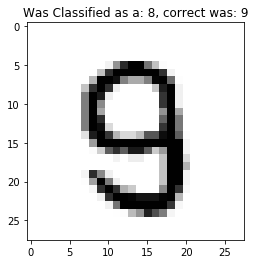

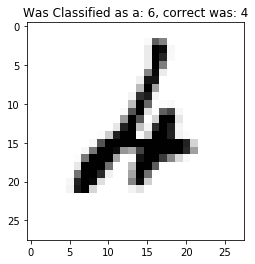

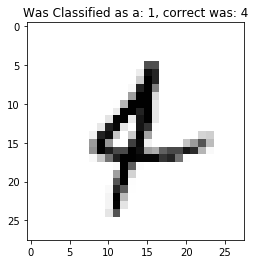

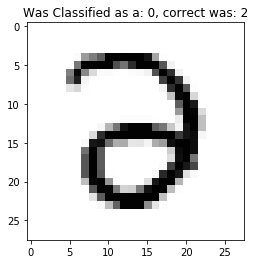

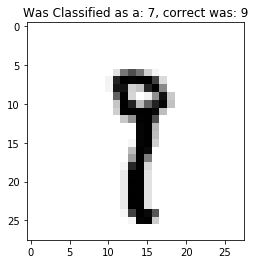

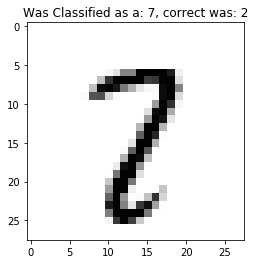

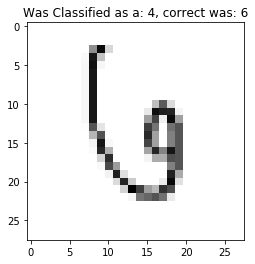

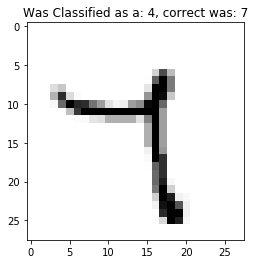

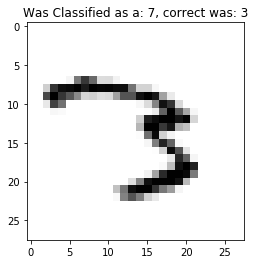

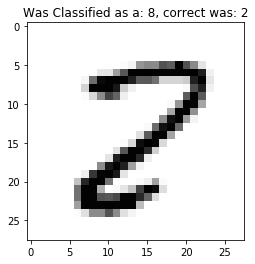

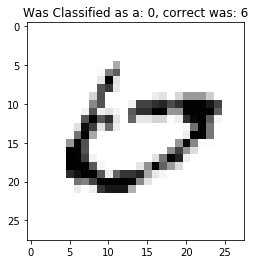

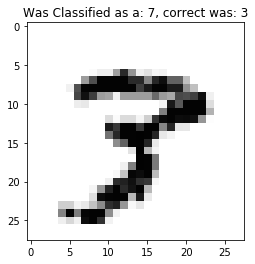

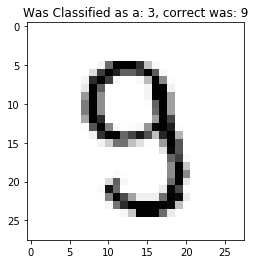

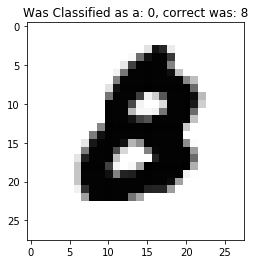

In [18]:
t=time.clock()

sklearn_knn = KNC(5,algorithm="brute") #  initialize sklearn to use k=5
sklearn_knn.fit(train_data,train_labels) #  train sklearn

tempData = test_data[:500] #  split the data into the last 500 because more and plotting becomes cumbersome
tempLabels = test_labels[:500] #  These three arrays can be changed to take all the data and it will still work
matchingUnflatData = notFlatTestData[:500] #  I would recommend if doing so to comment out the plotting in the first loop

predictions = sklearn_knn.predict(tempData) #  predict what the test data is
missclassification = predictions!=tempLabels #  find which ones it missclassified
print("Time taken:\t\t",time.clock()-t)

idx = np.argwhere(missclassification==True) #  find the indices of the missclassified data
pairs = []

for i in idx: #  loop over these indices
    plt.figure() #Plots appear at the bottom of all the text , better not to go above 500 as it will open up a lot of plots and matplotlib will complain, I recommend commenting it if you want it to work for the whole dataset
    plt.imshow(matchingUnflatData[i[0]],cmap="Greys")
    plt.title('Was Classified as a: %.d, correct was: %.d'%(predictions[i],tempLabels[i]))
    
    neighbs = [] #  find the nearest neighbours of that index
    print('Prediction was: ',predictions[i]) #  print what we had guessed using sklearn
    nearestNeighbours = sklearn_knn.kneighbors(tempData[i],n_neighbors=5,return_distance=False)[0]
    
    for j in nearestNeighbours:
        neighbs.append(train_labels[j]) #  get the classification of those nearest neighbours
    print('The 5 nearest neighbours were: ',neighbs) #  print out the 5 nearest neighbours
    print('The correct answer was: ', tempLabels[i],'\n') #  print out what the actual label was
